<a href="https://colab.research.google.com/github/Agshinbayli/data_with_python/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

--2022-05-01 13:57:49--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: ‘seeds.csv’

seeds.csv           100%[===================>]   9.17K  --.-KB/s    in 0s      

2022-05-01 13:57:49 (80.1 MB/s) - ‘seeds.csv’ saved [9386/9386]



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
16,13.99,13.83,0.9183,5.119,3.383,5.2340
104,18.95,16.42,0.8829,6.248,3.755,3.3680
164,11.14,12.79,0.8558,5.011,2.794,6.3880
93,18.59,16.05,0.9066,6.037,3.860,6.0010
22,15.88,14.90,0.8988,5.618,3.507,0.7651
66,14.34,14.37,0.8726,5.630,3.190,1.3130
122,16.17,15.38,0.8588,5.762,3.387,4.2860
182,12.19,13.36,0.8579,5.240,2.909,4.8570
144,11.82,13.40,0.8274,5.314,2.777,4.4710
192,11.87,13.02,0.8795,5.132,2.953,3.5970


In [2]:
data.columns

Index(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'asymmetry_coefficient', 'groove_length', 'species'],
      dtype='object')

In [3]:
data.head(5)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called Principal Component Analysis (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

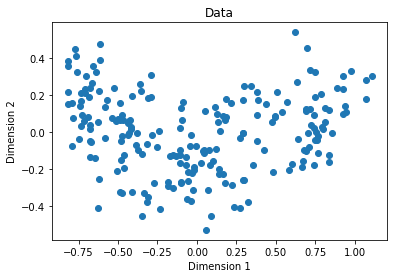

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the within cluster sum of squares (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

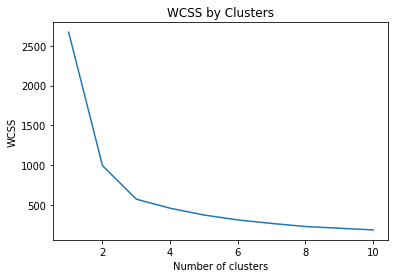

In [6]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()